In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io

In [5]:
from google.colab import files
upload = files.upload()

Saving glass.csv to glass.csv


In [6]:
df = pd.read_csv(io.BytesIO(upload['glass.csv']))

In [11]:
df.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.0,0.00,1
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.0,0.00,1
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,1
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,1


In [9]:
df.shape

(214, 10)

In [10]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [12]:
sum(df['Ba'] ==0.0)

176

In [14]:
sum(df['Fe'] ==0.0)

144

In [15]:
from sklearn.preprocessing import StandardScaler

st = StandardScaler()

In [16]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test , y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =4)

In [18]:
X_train.shape

(171, 9)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)

In [20]:
kn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [21]:
y_pred = kn.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test , y_pred)

0.7906976744186046

In [25]:
score = []

for i in range(1,10):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train)
  y_pred = kn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))


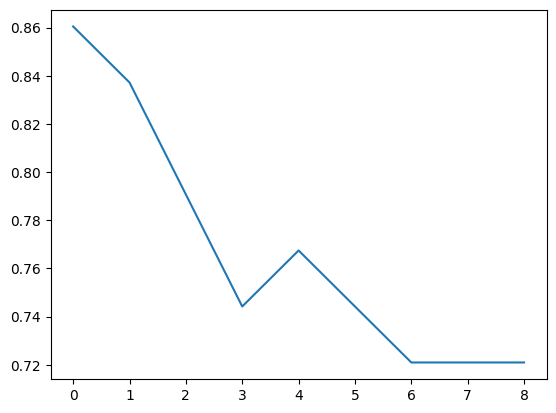

In [26]:
plt.plot(score)

In [28]:
kn = KNeighborsClassifier(n_neighbors=2)
kn.fit(X_train,y_train)
y_pred = kn.predict(X_test)
accuracy_score(y_test,y_pred)

0.8372093023255814

## Now after transformation

In [29]:
X_train = st.fit_transform(X_train)
X_test = st.transform(X_test)

In [30]:
kn1 = KNeighborsClassifier(n_neighbors=2)
kn1.fit(X_train,y_train)
y_pred1 = kn1.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8604651162790697

In [31]:
score = []

for i in range(1,10):
  kn = KNeighborsClassifier(n_neighbors=i)
  kn.fit(X_train,y_train)
  y_pred = kn.predict(X_test)
  score.append(accuracy_score(y_test,y_pred))

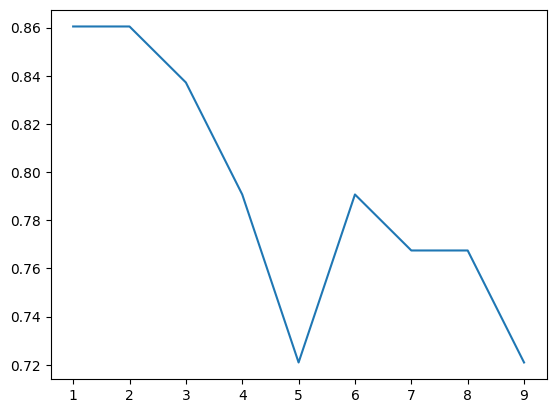

In [33]:
plt.plot(range(1,10),score)
plt.show()